#**ANALYSE DES SENTIMENTS DE LA PLATEFORME REMOTE**

In [ ]:
# Importation des modules
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

**IMPORTATIONS DES PATHS DE MES DATASETS**

In [ ]:
# Voir la liste de tous nos fichier
directory = '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets'
files = glob.glob(directory + '/*')
files

['/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/deel_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oyster_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/remote_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oyster_getapps.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/deel_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oysterhr_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/remote_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/rippling_truspilot.csv']

## **Data Cleaning et Traitement des données de la plateforme remote**

In [ ]:
# Création de la fonction qui gère le datacleaning par défaut de toutes les datasets
def wrangle(path):
  # Read the datasets
  df = pd.read_csv(path)
  # Transformer le type des colonnes
    # Convertir la première colonne en str
  df['Plateforme'] = df['Plateforme'].astype(str)
  df['Avis'] = df['Avis'].astype(str)
    # Remplaçons les virgules par les points
  #df['Notes sur 5'] = df['Notes sur 5'].str.replace(',', '.')
  #df['Notes sur 5'] = df['Notes sur 5'].astype(float)

  return df



In [ ]:
remote_df1 = wrangle('/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/remote_capteras.csv')
print(remote_df1.shape)

remote_df2 = wrangle('/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/remote_truspilot.csv')
print(remote_df2.shape)

# Supprimer quelques colonnes
remote_df2 = remote_df2.drop(columns = ['Utilisateur', 'Nombre de commentaires', 'Position Géographique', 'Date'], axis = 1)
remote_df2.head()

# Concaténation des deux datasets
remote_df = pd.concat([remote_df1, remote_df2], ignore_index = True)
df = remote_df

(42, 3)
(440, 7)


In [ ]:
  # Remplaçons les virgules par les points
  df['Notes sur 5'] = df['Notes sur 5'].str.replace(',', '.')
  df['Notes sur 5'] = df['Notes sur 5'].astype(float)

    # Voir la moyenne de la colonne notes
  mean_notes = df['Notes sur 5'].mean()
  df['Notes sur 5'] = df['Notes sur 5'].fillna(mean_notes)
  df['Notes sur 5'] = df['Notes sur 5'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Plateforme   482 non-null    object
 1   Avis         482 non-null    object
 2   Notes sur 5  482 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.4+ KB


In [ ]:
df.head()

,Plateforme,Avis,Notes sur 5
0,Remote,Easy Remote Work,4
1,Remote,Great Service,4
2,Remote,Praise for Customer Support,4
3,Remote,The only way a startup can manage a global wor...,4
4,Remote,A go-to EOR system,4


In [ ]:
df.shape

(482, 3)

In [ ]:
df['Notes sur 5'].unique()

array([4, 5, 3])

In [ ]:
df.head()

,Plateforme,Avis,Notes sur 5
0,Remote,Easy Remote Work,4
1,Remote,Great Service,4
2,Remote,Praise for Customer Support,4
3,Remote,The only way a startup can manage a global wor...,4
4,Remote,A go-to EOR system,4


In [ ]:
# Assurez-vous d'avoir importé pandas
import pandas as pd

# Supposez que votre DataFrame est nommé df et qu'il est déjà nettoyé
# Par exemple, vous avez un DataFrame nettoyé comme suit :
# df = ...

# Spécifiez le chemin où vous souhaitez enregistrer le fichier CSV
chemin_du_fichier = "/content/drive/MyDrive/TALENT VIRTUEL/DATA CLEANING/remote_nettoye.csv"

# Enregistrez le DataFrame dans un fichier CSV
df.to_csv(chemin_du_fichier, index=False)  # Si vous ne voulez pas inclure l'index dans le fichier CSV


**Simple Analyse des Scores**

<Axes: title={'center': 'Histogramme des avis'}, xlabel='Notes sur 5'>

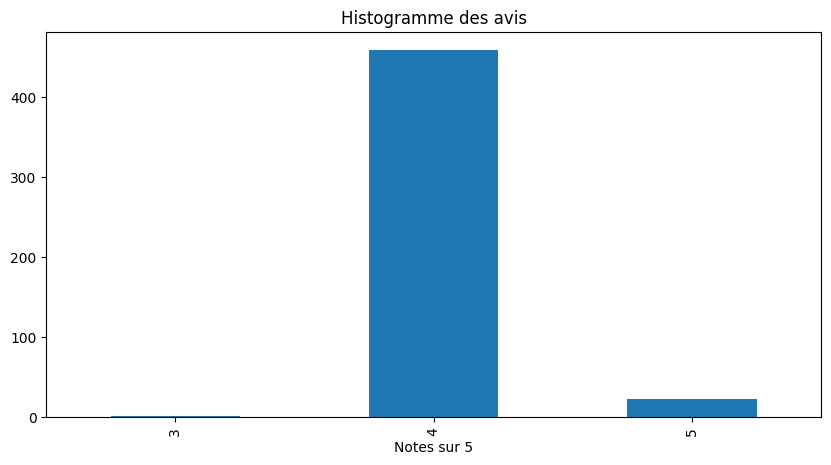

In [ ]:
df['Notes sur 5'].value_counts().sort_index().plot(kind='bar', title = "Histogramme des avis",
                                                   xlabel = "Notes sur 5",
                                                   figsize=(10, 5))

**Importation de la bibliothèque NLTK**:

In [ ]:
# Importation des modules
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**UTILISATION DE VADER POUR LA GESTION DES SCORES DES SENTIMENTS (POSITIVE | NEGATIVE | NEUTRE)**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [ ]:
# Instancier l'analyseur des sentiments
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
exemple = df['Avis'][23]

In [ ]:
# Voir pour notre exemple les scores des polarités
sia.polarity_scores(exemple)

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

In [ ]:
df.index

RangeIndex(start=0, stop=482, step=1)

In [ ]:
len(df)

482

In [ ]:
# Créer une liste de valeurs pour la colonne ID
id_values = ['REMOTE' + str(i) for i in range(1, len(df) + 1)]

# Ajouter la colonne ID au DataFrame
df['ID'] = id_values


In [ ]:
df.head()

,Plateforme,Avis,Notes sur 5,ID
0,Remote,Easy Remote Work,4,REMOTE1
1,Remote,Great Service,4,REMOTE2
2,Remote,Praise for Customer Support,4,REMOTE3
3,Remote,The only way a startup can manage a global wor...,4,REMOTE4
4,Remote,A go-to EOR system,4,REMOTE5


In [ ]:
# Passer à l'analyse des scores des polarités pour tout le datasets
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Avis']
  myid = row['ID']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/482 [00:00<?, ?it/s]

In [ ]:
# Voir le résultats
res

{'REMOTE1': {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404},
 'REMOTE2': {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249},
 'REMOTE3': {'neg': 0.0, 'neu': 0.241, 'pos': 0.759, 'compound': 0.743},
 'REMOTE4': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'REMOTE5': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'REMOTE6': {'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.7964},
 'REMOTE7': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'REMOTE8': {'neg': 0.0, 'neu': 0.227, 'pos': 0.773, 'compound': 0.7783},
 'REMOTE9': {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4926},
 'REMOTE10': {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.3818},
 'REMOTE11': {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.8478},
 'REMOTE12': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'REMOTE13': {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.5423},
 'REMOTE14': {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'compound

In [ ]:
# Transformer ça en dataframe pour bien le manipuler
df_vader = pd.DataFrame(res).T
df_vader = df_vader.reset_index().rename(columns={'index':'ID'})
df_vader = df_vader.merge(df, how='left')

In [ ]:
df_vader.head()

,ID,neg,neu,pos,compound,Plateforme,Avis,Notes sur 5
0,REMOTE1,0.0,0.408,0.592,0.4404,Remote,Easy Remote Work,4
1,REMOTE2,0.0,0.196,0.804,0.6249,Remote,Great Service,4
2,REMOTE3,0.0,0.241,0.759,0.7430,Remote,Praise for Customer Support,4
3,REMOTE4,0.0,1.000,0.000,0.0000,Remote,The only way a startup can manage a global wor...,4
4,REMOTE5,0.0,1.000,0.000,0.0000,Remote,A go-to EOR system,4


**Affichage des graphiques du Vaders**

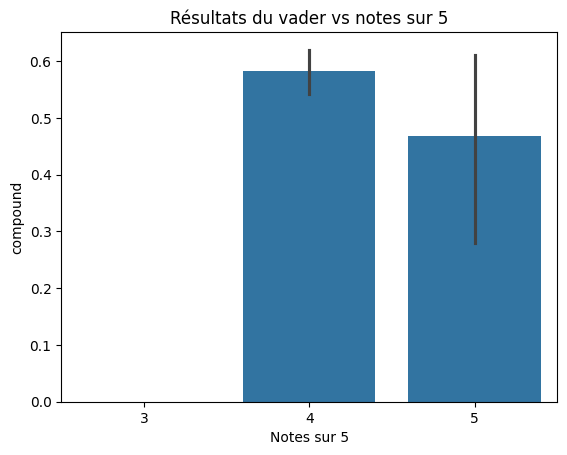

In [ ]:
ax = sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'compound')
ax.set_title("Résultats du vader vs notes sur 5")
plt.show()

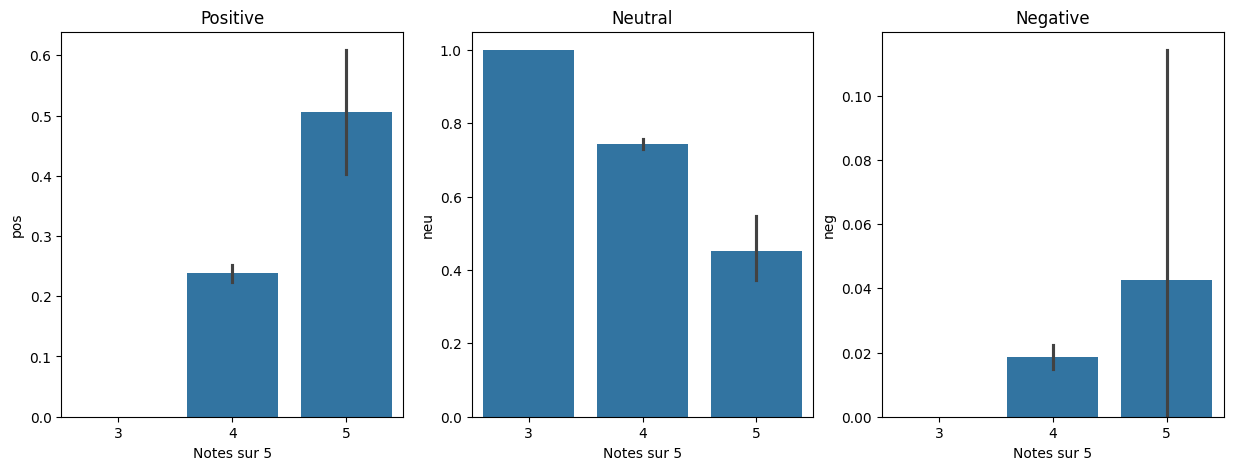

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data = df_vader, x ='Notes sur 5', y = 'pos',  ax = axs[0])
sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'neu', ax = axs[1])
sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

#Pré-entrainement du modèle

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# Utilisation d'un modèle pré-entrainé
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
# Voir le score des textes  avec notre VADER
print(exemple)

sia.polarity_scores(text)

A great EoR


{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4019}

In [ ]:
print(exemple)

A great EoR


In [ ]:
# Exécuter notre modèle de NLP basé sur Roberta Model
encoded_text = tokenizer(exemple, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
scores_dict

{'roberta_neg': 0.0048587476,
 'roberta_neu': 0.10533272,
 'roberta_pos': 0.8898086}

In [ ]:
# Utilisationn du modèle sur notre datasests
def polarity_scores_roberta(exemple):
    encoded_text = tokenizer(exemple, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [ ]:
# Passer à l'analyse des scores des polarités pour tout le datasets
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
 try:
      text = row['Avis']
      myid = row['ID']
      vader_result = sia.polarity_scores(text)
      vader_result_rename = {}
      for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
      robertar_result = polarity_scores_roberta(text)

      robertar_result = polarity_scores_roberta(text)
      both = {**vader_result, **robertar_result}
      res[myid] = both
 except RuntimeError:
      print(f'Stoppé pour le numéro {myid}')


  0%|          | 0/482 [00:00<?, ?it/s]

Stoppé pour le numéro REMOTE203
Stoppé pour le numéro REMOTE462


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'ID'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Notes sur 5
0,REMOTE1,0.000,0.408,0.592,0.4404,0.010579,0.435542,0.553879,Remote,Easy Remote Work,4
1,REMOTE2,0.000,0.196,0.804,0.6249,0.014586,0.127496,0.857918,Remote,Great Service,4
2,REMOTE3,0.000,0.241,0.759,0.7430,0.005225,0.192470,0.802305,Remote,Praise for Customer Support,4
3,REMOTE4,0.000,1.000,0.000,0.0000,0.014995,0.325096,0.659909,Remote,The only way a startup can manage a global wor...,4
4,REMOTE5,0.000,1.000,0.000,0.0000,0.063484,0.806415,0.130101,Remote,A go-to EOR system,4
...,...,...,...,...,...,...,...,...,...,...,...
475,REMOTE478,0.000,0.671,0.329,0.6588,0.003690,0.144937,0.851373,remote.com,PayslipSuper responsive and clear answer about...,4
476,REMOTE479,0.000,0.483,0.517,0.9738,0.001530,0.011076,0.987393,remote.com,Great user support from OluwakemiHello! Oluwak...,4
477,REMOTE480,0.000,0.811,0.189,0.9071,0.001718,0.009824,0.988457,remote.com,I'm using Remote since a couple of…I'm using R...,4
478,REMOTE481,0.026,0.685,0.290,0.9856,0.001837,0.010369,0.987794,remote.com,Remote & Maruthi MedisettyRemote's offering an...,4


###**Comparer les deux modèles**

In [ ]:
results_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'Plateforme', 'Avis', 'Notes sur 5'],
      dtype='object')

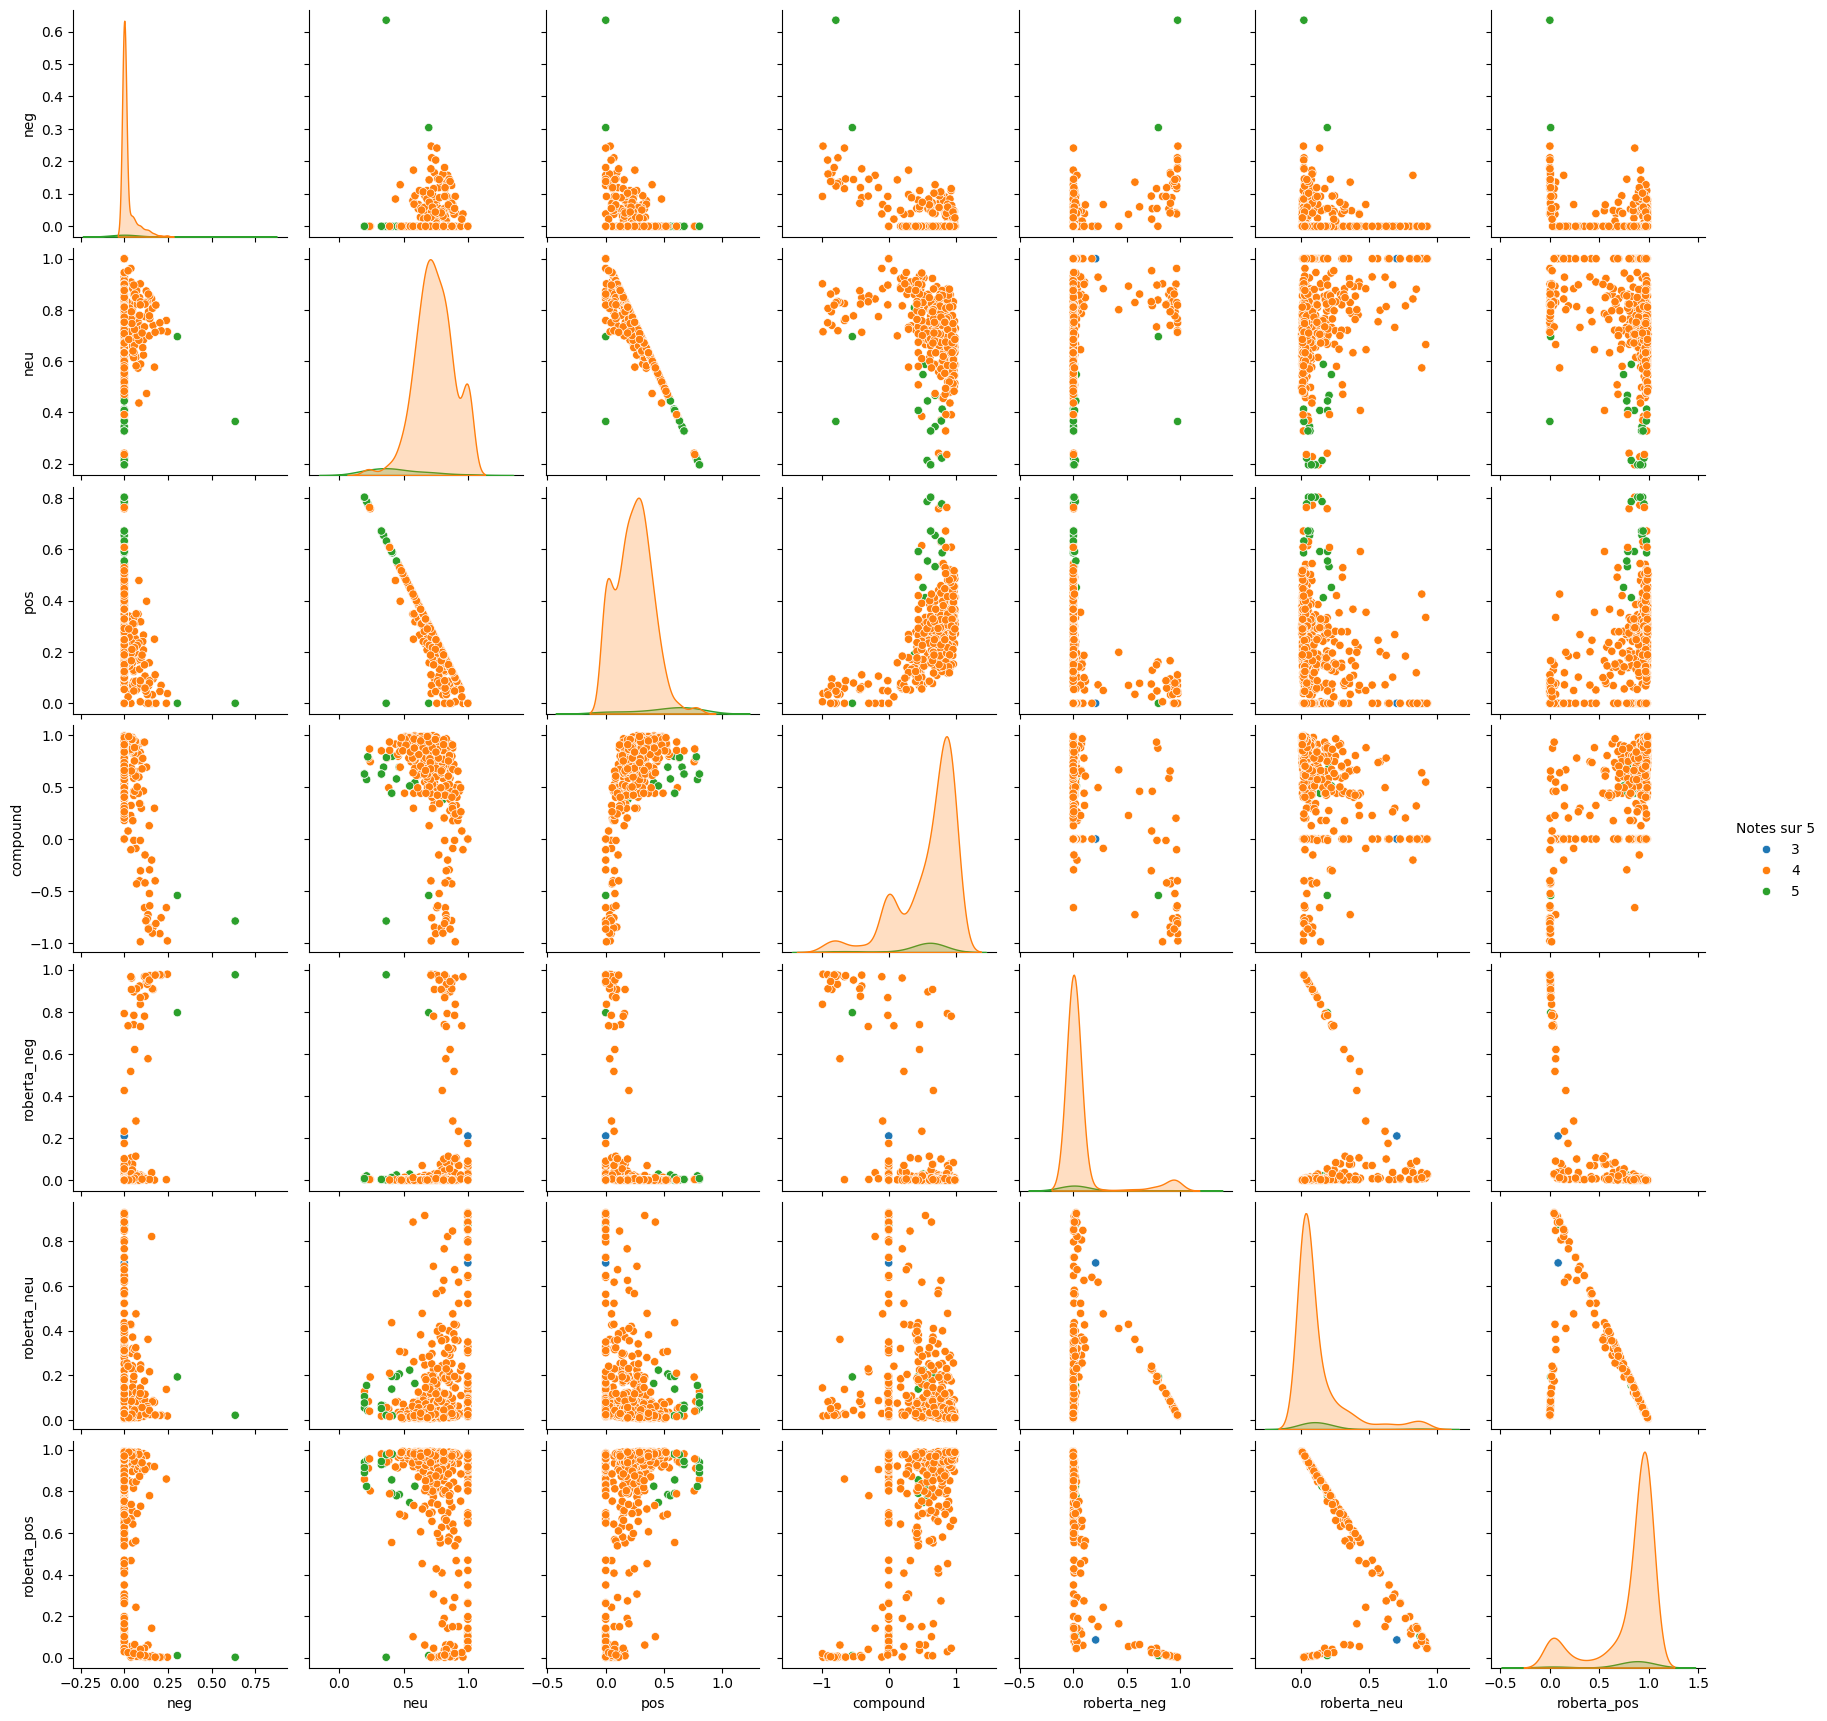

In [ ]:
sns.pairplot(data = results_df, vars = ['neg', 'neu', 'pos', 'compound',
                                       'roberta_neg', 'roberta_neu',
                                       'roberta_pos'],
             hue='Notes sur 5',
             palette = 'tab10')
plt.show()

In [ ]:
# Tester notre modèles sur nos données
results_df.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Notes sur 5
0,REMOTE1,0.0,0.408,0.592,0.4404,0.010579,0.435542,0.553879,Remote,Easy Remote Work,4
1,REMOTE2,0.0,0.196,0.804,0.6249,0.014586,0.127496,0.857918,Remote,Great Service,4
2,REMOTE3,0.0,0.241,0.759,0.7430,0.005225,0.192470,0.802305,Remote,Praise for Customer Support,4
3,REMOTE4,0.0,1.000,0.000,0.0000,0.014995,0.325096,0.659909,Remote,The only way a startup can manage a global wor...,4
4,REMOTE5,0.0,1.000,0.000,0.0000,0.063484,0.806415,0.130101,Remote,A go-to EOR system,4


In [ ]:
# Renommons la dernière colonne
results_df = results_df.rename(columns={'Notes sur 5' : 'Scores'})
results_df.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores
0,REMOTE1,0.0,0.408,0.592,0.4404,0.010579,0.435542,0.553879,Remote,Easy Remote Work,4
1,REMOTE2,0.0,0.196,0.804,0.6249,0.014586,0.127496,0.857918,Remote,Great Service,4
2,REMOTE3,0.0,0.241,0.759,0.7430,0.005225,0.192470,0.802305,Remote,Praise for Customer Support,4
3,REMOTE4,0.0,1.000,0.000,0.0000,0.014995,0.325096,0.659909,Remote,The only way a startup can manage a global wor...,4
4,REMOTE5,0.0,1.000,0.000,0.0000,0.063484,0.806415,0.130101,Remote,A go-to EOR system,4


In [ ]:
# Vérification de la reponses avec Robertar
results_df.query('Scores == 4').sort_values('roberta_pos', ascending = False)['Avis'].values[3]

"Great company and friendly staffI've had a wonderful experience with Remote.com so far. I have been in touch mostly with Hakan, who was very friendly, attentive and very quick to respond, even late at night and on bank holidays which was not expected at all! Thank you Hakan for all your help and for making the onboarding process a lot easier for me:)Date of experience: December 28, 2023"

In [ ]:
# Vérification de la reponses avec Vader
results_df.query('Scores == 4').sort_values('pos', ascending = False)['Avis'].values[3]

'Praise for Customer Support'

In [ ]:
results_df.query('Scores == 5').sort_values('roberta_pos', ascending = False)['Avis'].values[1]

'Great service - would highly recommend Remote'

In [ ]:
results_df.query('Scores == 5').sort_values('pos', ascending = False)['Avis'].values[13]

'Hiring talent across the world made easy'

In [ ]:
results_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'Plateforme', 'Avis', 'Scores'],
      dtype='object')

**METTRE AU CLAIR LE DATASETS**

In [ ]:
df = results_df.drop(columns = ['neg', 'neu', 'pos', 'compound'], axis = 1)
df.head()

,ID,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores
0,REMOTE1,0.010579,0.435542,0.553879,Remote,Easy Remote Work,4
1,REMOTE2,0.014586,0.127496,0.857918,Remote,Great Service,4
2,REMOTE3,0.005225,0.192470,0.802305,Remote,Praise for Customer Support,4
3,REMOTE4,0.014995,0.325096,0.659909,Remote,The only way a startup can manage a global wor...,4
4,REMOTE5,0.063484,0.806415,0.130101,Remote,A go-to EOR system,4


# **Utilisation des Transformers pour être plus précis**

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# Exemple du mode de fonctionnement des transformers
sent_pipeline("I love m'y self")

[{'label': 'POSITIVE', 'score': 0.9997005462646484}]

In [ ]:
# Applications sur l'ensembles de nos datasets
def analyze_sentiment(text):
  return sent_pipeline(text)[0]

# Créer une dernière colonne
df['Sentiment'] = df['Avis'].apply(analyze_sentiment)


In [ ]:
df.head()

,ID,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores,Sentiment
0,REMOTE1,0.010579,0.435542,0.553879,Remote,Easy Remote Work,4,"{'label': 'POSITIVE', 'score': 0.9898692965507..."
1,REMOTE2,0.014586,0.127496,0.857918,Remote,Great Service,4,"{'label': 'POSITIVE', 'score': 0.9998434782028..."
2,REMOTE3,0.005225,0.192470,0.802305,Remote,Praise for Customer Support,4,"{'label': 'POSITIVE', 'score': 0.9996681213378..."
3,REMOTE4,0.014995,0.325096,0.659909,Remote,The only way a startup can manage a global wor...,4,"{'label': 'NEGATIVE', 'score': 0.9996082186698..."
4,REMOTE5,0.063484,0.806415,0.130101,Remote,A go-to EOR system,4,"{'label': 'POSITIVE', 'score': 0.7360816597938..."


In [ ]:
# Créer de nouvelles colonnes pour être plus précis et fuide
## Extraire les classes
df['Classe'] = df['Sentiment'].apply(lambda x: x['label'])
## Vérification des classes
print(df['Classe'].unique())
## Extraires les proportions affectés à chaque classes
df['Proportion_classe'] = df['Sentiment'].apply(lambda x: x['score'])
## Vérification des proportions
print(df['Proportion_classe'].unique())

['POSITIVE' 'NEGATIVE']
[0.9898693  0.99984348 0.99966812 0.99960822 0.73608166 0.99985003
 0.91712284 0.99987328 0.99980515 0.9928596  0.99988043 0.68856281
 0.99965429 0.99631101 0.99977106 0.99987185 0.99985647 0.99985766
 0.9998579  0.99534601 0.9997353  0.99657142 0.99930048 0.99954385
 0.99986815 0.9987992  0.99963772 0.99984705 0.91313952 0.9998672
 0.98301482 0.99963105 0.99987733 0.99905163 0.99985754 0.98092288
 0.99910599 0.94002581 0.99885428 0.99985492 0.99982065 0.99817419
 0.99970335 0.9994505  0.99812049 0.99978751 0.99982327 0.99985421
 0.99936229 0.99979168 0.99977428 0.98927033 0.99068975 0.99981052
 0.99927419 0.99975032 0.99636322 0.99864048 0.99945635 0.99940276
 0.99984789 0.99882561 0.99980301 0.99983966 0.99029374 0.99944252
 0.99981409 0.9993456  0.99970078 0.99899536 0.95949233 0.99909639
 0.88731909 0.99968386 0.98365331 0.999331   0.99972528 0.98736423
 0.9790917  0.9985109  0.9986105  0.99982834 0.99981076 0.99798679
 0.99951005 0.99976414 0.99953616 0.999

In [ ]:
# Voir notre nouvelle dataframe
df.head()

,ID,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores,Sentiment,Classe,Proportion_classe
0,REMOTE1,0.010579,0.435542,0.553879,Remote,Easy Remote Work,4,"{'label': 'POSITIVE', 'score': 0.9898692965507...",POSITIVE,0.989869
1,REMOTE2,0.014586,0.127496,0.857918,Remote,Great Service,4,"{'label': 'POSITIVE', 'score': 0.9998434782028...",POSITIVE,0.999843
2,REMOTE3,0.005225,0.192470,0.802305,Remote,Praise for Customer Support,4,"{'label': 'POSITIVE', 'score': 0.9996681213378...",POSITIVE,0.999668
3,REMOTE4,0.014995,0.325096,0.659909,Remote,The only way a startup can manage a global wor...,4,"{'label': 'NEGATIVE', 'score': 0.9996082186698...",NEGATIVE,0.999608
4,REMOTE5,0.063484,0.806415,0.130101,Remote,A go-to EOR system,4,"{'label': 'POSITIVE', 'score': 0.7360816597938...",POSITIVE,0.736082


In [ ]:
# Supprimer la colonne du modèle roberta qui est déjà utilisé par notre transformer
df = df.drop(columns = ['roberta_neg', 'roberta_pos', 'roberta_neu', 'Sentiment'], axis=1)
df.head()

,ID,Plateforme,Avis,Scores,Classe,Proportion_classe
0,REMOTE1,Remote,Easy Remote Work,4,POSITIVE,0.989869
1,REMOTE2,Remote,Great Service,4,POSITIVE,0.999843
2,REMOTE3,Remote,Praise for Customer Support,4,POSITIVE,0.999668
3,REMOTE4,Remote,The only way a startup can manage a global wor...,4,NEGATIVE,0.999608
4,REMOTE5,Remote,A go-to EOR system,4,POSITIVE,0.736082


# **Analyse des Tendances**

In [ ]:
df.head()

,ID,Plateforme,Avis,Scores,Classe,Proportion_classe
0,REMOTE1,Remote,Easy Remote Work,4,POSITIVE,0.989869
1,REMOTE2,Remote,Great Service,4,POSITIVE,0.999843
2,REMOTE3,Remote,Praise for Customer Support,4,POSITIVE,0.999668
3,REMOTE4,Remote,The only way a startup can manage a global wor...,4,NEGATIVE,0.999608
4,REMOTE5,Remote,A go-to EOR system,4,POSITIVE,0.736082


**HISTOGRAMME DE LA DISTRIBUTION DE LA CLASSE DES SENTIMENTS DE LA PLATEFORME REMOTE**

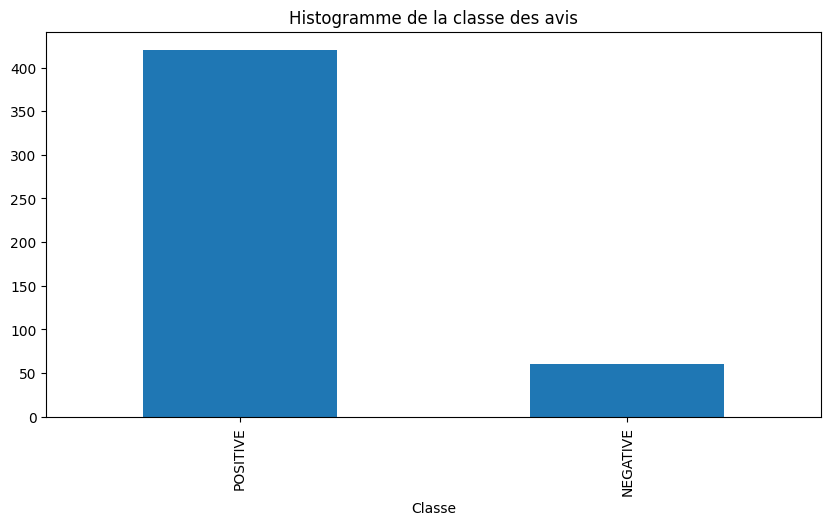

In [ ]:
df['Classe'].value_counts().plot(kind = 'bar', title = "Histogramme de la classe des avis",
                                 xlabel = 'Classe',
                                 figsize = (10, 5))
plt.show()

**Voir la distribution entre la prédiction des classes de notre transformers et puis le score réel affectés par l'internautes**

<Axes: title={'center': 'Relation entre Classe et Scores'}, xlabel='Classe', ylabel='Proportion des scores suivant la classe'>

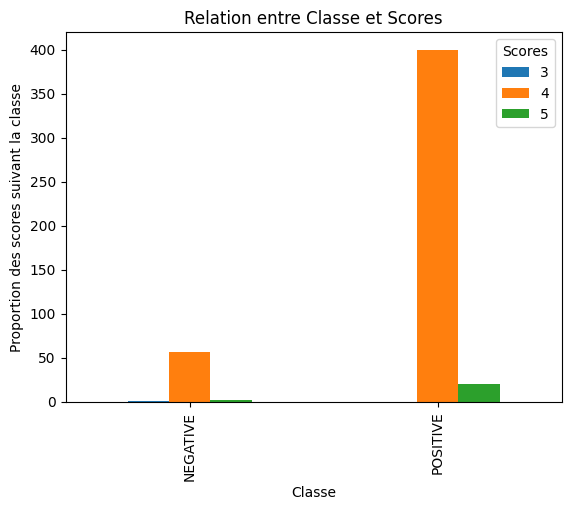

In [ ]:
# Grouper d'abord les deux colonnes cibles
df.groupby('Classe')['Scores'].value_counts().unstack().plot(kind = 'bar',
                                                             title = "Relation entre Classe et Scores",
                                                             xlabel = "Classe",
                                                             ylabel = "Proportion des scores suivant la classe")

In [ ]:
df.head()

,ID,Plateforme,Avis,Scores,Classe,Proportion_classe
0,REMOTE1,Remote,Easy Remote Work,4,POSITIVE,0.989869
1,REMOTE2,Remote,Great Service,4,POSITIVE,0.999843
2,REMOTE3,Remote,Praise for Customer Support,4,POSITIVE,0.999668
3,REMOTE4,Remote,The only way a startup can manage a global wor...,4,NEGATIVE,0.999608
4,REMOTE5,Remote,A go-to EOR system,4,POSITIVE,0.736082


**IDENTIFICATION DES POINTS FORTS ET DES FAIBLESSES DE LA PLATEFORME DEEL SELON LES AVIS DES CLIENTS**

In [ ]:
df.head()

,ID,Plateforme,Avis,Scores,Classe,Proportion_classe
0,REMOTE1,Remote,Easy Remote Work,4,POSITIVE,0.989869
1,REMOTE2,Remote,Great Service,4,POSITIVE,0.999843
2,REMOTE3,Remote,Praise for Customer Support,4,POSITIVE,0.999668
3,REMOTE4,Remote,The only way a startup can manage a global wor...,4,NEGATIVE,0.999608
4,REMOTE5,Remote,A go-to EOR system,4,POSITIVE,0.736082


In [ ]:
#Créer de nouvelles jeux de données
reviews_positive = df[df['Classe'] == "POSITIVE"] # Avis positive
reviews_negative = df[df['Classe'] == "NEGATIVE"] # Avis negative

In [ ]:
# Trier
trie_reviews_positive = reviews_positive.sort_values(by = "Proportion_classe", ascending = False)
trie_reviews_negative = reviews_negative.sort_values(by = "Proportion_classe", ascending = False)

In [ ]:
# Les avis positifs
sorted_reviews_positive = trie_reviews_positive['Avis']

# Créer un DataFrame avec les avis triés
sorted_reviews_positive_df = pd.DataFrame(sorted_reviews_positive, columns=['Avis'])


In [ ]:
# Les avis negative
sorted_reviews_negative = trie_reviews_negative['Avis']

# Créer un DataFrame avec les avis triés
sorted_reviews_negative_df = pd.DataFrame(sorted_reviews_negative, columns=['Avis'])


In [ ]:
# Réinitialiser les index
sorted_reviews_positive_df.reset_index(drop=True, inplace=True)
sorted_reviews_positive_df.head()

,Avis
0,Emy has truly enhanced my experience…Emy has t...
1,Great platform with amazing customer service!
2,Smooth collaboration and great customer support
3,"Shuchi was amazingShuchi was amazing! Clear, c..."
4,Adriana is the best!!Adriana Cespedes was grea...


In [ ]:
# Réinitialiser les index
sorted_reviews_negative_df.reset_index(drop=True, inplace=True)
sorted_reviews_negative_df.head()

,Avis
0,Worst customer service in the world.I've been ...
1,Very unprofessional and poor customer service.
2,This company does not have a clue on…This comp...
3,Terrible onboarding and customer…Terrible onbo...
4,Very bad serviceVery bad service. It takes wee...


In [ ]:
# Afficher le premier avis positifs
exemple = sorted_reviews_positive_df['Avis'][0]
exemple


'Emy has truly enhanced my experience…Emy has truly enhanced my experience and made it exceptionally positive. I am grateful for her remarkable ability to provide me with the necessary information promptly, along with her swift responses.Date of experience: June 14, 2023'

In [ ]:
# Afficher le premier avis negatif
exemple2 = sorted_reviews_negative_df['Avis'][0]
exemple2


"Worst customer service in the world.I've been asking for form T220  for a month and nobody wants to help me. Customer service is not responsive. No way to contact them. It is responsibility of remote.com to provide their employees with form T220 for tax filing. They won't even provide it . They keep on saying technical glitch for more than a month now. Avoid this company please!!Date of experience: February 18, 2024"

In [ ]:
# Voyons les 20 premiers commentaires positifs
nmbre_commentaires = 20

for i in range(nmbre_commentaires):
  print(sorted_reviews_positive_df['Avis'][i])

Emy has truly enhanced my experience…Emy has truly enhanced my experience and made it exceptionally positive. I am grateful for her remarkable ability to provide me with the necessary information promptly, along with her swift responses.Date of experience: June 14, 2023
Great platform with amazing customer service!
Smooth collaboration and great customer support
Shuchi was amazingShuchi was amazing! Clear, concise and very responsive.Date of experience: August 17, 2023
Adriana is the best!!Adriana Cespedes was great! She was very helpful and really went above and beyond!!Date of experience: August 17, 2023
Great support and feedback
Very good!Very good!I have good experience with the support team.Date of experience: July 11, 2023
Great experience
Awesome in all aspects.Date of experience: March 16, 2023
Great service and great support!Date of experience: July 18, 2023
Shuchi Kumar has made the onboarding…Shuchi Kumar has made the onboarding process smooth and pleasant!Date of experienc

In [ ]:
!pip install googletrans==4.0.0-rc1

# **LES COMMENTAIRES DES INTERNAUTES: AVIS POSITIFS ET AVIS NEGATIFS**

**10 MEILLEURES AVIS POSITIVE TRADUITE EN FRANCAIS**

In [ ]:
from googletrans import Translator

# Initialiser le traducteur
translator = Translator()

# Nombre de commentaires à traduire
nombre_commentaires = 20

# Traduire et afficher les 20 premiers commentaires
for i in range(nombre_commentaires):
    commentaire = sorted_reviews_positive_df['Avis'][i]
    translation = translator.translate(commentaire, src='en', dest='fr')
    print(translation.text)


Emy a vraiment amélioré mon expérience… Emy a vraiment amélioré mon expérience et l'a rendu exceptionnellement positif.Je suis reconnaissante pour sa remarquable capacité à me fournir rapidement les informations nécessaires, ainsi que ses réponses rapides. Date d'expérience: 14 juin 2023
Excellente plate-forme avec un service client incroyable!
Collaboration fluide et excellent support client
Shuchi était Amazingshuchi était incroyable!Clear, concis et très réactif. Date d'expérience: 17 août 2023
Adriana est la meilleure !! Adriana Cespedes était super!Elle a été très serviable et est vraiment allée au-delà !! Date d'expérience: 17 août 2023
Excellent soutien et commentaires
Très bien! Très bien! J'ai une bonne expérience avec l'équipe de soutien. Date d'expérience: 11 juillet 2023
Belle expérience
Génial dans tous les aspects. Date de l'expérience: 16 mars 2023
Grand service et excellent soutien! Date d'expérience: 18 juillet 2023
Shuchi Kumar a fait l'intégration… Shuchi Kumar a ren

**10 MEILLEURE AVIS NEGATIVE TRADUITE EN FRANCAIS**

In [ ]:
from googletrans import Translator

# Initialiser le traducteur
translator = Translator()

# Nombre de commentaires à traduire
nombre_commentaires = 20

# Traduire et afficher les 20 premiers commentaires
for i in range(nombre_commentaires):
    commentaire = sorted_reviews_negative_df['Avis'][i]
    translation = translator.translate(commentaire, src='en', dest='fr')
    print(translation.text)


Pire service client du monde. Je demande le formulaire T220 depuis un mois et personne ne veut m'aider.Le service client n'est pas réactif.Aucun moyen de les contacter.Il est de la responsabilité de Remote.com de fournir à leurs employés le formulaire T220 pour le dépôt d'impôts.Ils ne le fourniront même pas.Ils continuent de dire des problèmes techniques depuis plus d'un mois maintenant.Évitez cette entreprise s'il vous plaît !! Date d'expérience: 18 février 2024
Service client très peu professionnel et mauvais.
Cette entreprise n'a aucune idée… Cette entreprise n'a aucune idée de ce qu'elle fait!Ils m'ont chassé plusieurs semaines pour un paiement que j'ai fait il y a des semaines.De toute évidence, ils n'ont aucun contrôle sur les paiements et les résultats des résultats, ce qui est tout simplement triste. Date d'expérience: 02 février 2024
Terrible intérêt et client… Terrible intérêt et support client, puis en plus de tout cela, retardé les paiements de salaire.Cette entreprise n'a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**RECOMMANDATION**